In [26]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'challenge_CSC_52081_EP'))

from student_client.student_gym_env import create_student_gym_env
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

load_dotenv('D:\Personal\Polytechnique\3A\P2\CSC581RL\Challenge\RL_challenge\.env')  # 加载 .env 文件中的环境变量

env = create_student_gym_env(
    server_url=os.getenv('SERVER_URL'),
    user_token=os.getenv('USER_TOKEN')
)

2026-02-19 22:06:42,213 - student_client.student_gym_env - INFO - Client is up to date (version 0.2)
2026-02-19 22:06:42,245 - student_client.student_gym_env - INFO - Created new session: 87aff5ef-0891-4078-b0d6-93b8541f8234
2026-02-19 22:06:43,113 - student_client.student_gym_env - INFO - Created new episode: 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc
2026-02-19 22:06:43,113 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc


In [27]:
def analyze_failure_with_action0(num_episodes=20):
    """
    一直执行 action=0，分析 failure 特征
    """
    
    all_trajectories = []  # 存储每个 episode 的轨迹
    all_rewards = []       # 存储每个 episode 的所有 rewards
    failure_states = []    # failure 前的最后几个 state
    failure_steps = []     # failure 发生的 step
    final_rewards = []     # 最后一步的 reward
    
    for ep in range(num_episodes):
        state, info = env.reset()
        trajectory = [state.copy()]
        rewards = []
        step = 0
        
        while True:
            action = 0  # 一直什么都不做
            next_state, reward, done, truncated, info = env.step(action)
            
            trajectory.append(next_state.copy())
            rewards.append(reward)
            step += 1
            
            if done or truncated:
                print(f"\n=== Episode {ep+1} ===")
                print(f"  Steps until failure: {step}")
                print(f"  Final reward: {reward:.2f}")
                print(f"  Total reward: {sum(rewards):.2f}")
                print(f"  Last state shape: {next_state.shape}")
                print(f"  Last 3 states (每行是一个 timestep 的 9 维特征):")
                
                # 看最后几个 state
                if len(trajectory) >= 3:
                    for i, s in enumerate(trajectory[-3:]):
                        if len(s) >= 9:
                            last_9 = s[-9:] if len(s) > 9 else s
                            print(f"    t-{2-i}: {np.round(last_9, 4)}")
                
                failure_states.append(trajectory[-1])
                failure_steps.append(step)
                final_rewards.append(reward)
                all_trajectories.append(trajectory)
                all_rewards.append(rewards)  # 保存整个 episode 的 rewards
                break
    
    return {
        'trajectories': all_trajectories,
        'rewards': all_rewards,
        'failure_states': failure_states,
        'failure_steps': failure_steps,
        'final_rewards': final_rewards
    }

# 运行分析
results = analyze_failure_with_action0(num_episodes=5)

2026-02-19 22:06:44,031 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 1 ===
  Steps until failure: 36
  Final reward: -1000.00
  Total reward: 8277.12
  Last state shape: (4, 9)
  Last 3 states (每行是一个 timestep 的 9 维特征):
    t-2: [[7.9092639e+02 1.9252387e+04 3.3471381e+02 1.1167712e+03 3.7130001e-01
  1.3550231e+06 3.9515249e+03 0.0000000e+00 9.1672001e+00]
 [7.9081360e+02 1.9285303e+04 3.3501019e+02 1.1183369e+03 3.7160000e-01
  1.3493525e+06 3.9529980e+03 0.0000000e+00 9.3373003e+00]
 [7.9278790e+02 1.9296812e+04 3.3504340e+02 1.1177976e+03 3.7160000e-01
  1.3591961e+06 3.9534575e+03 0.0000000e+00 9.3952999e+00]
 [7.9033063e+02 1.9260713e+04 3.3509039e+02 1.1185355e+03 3.7169999e-01
  1.3473245e+06 3.9534900e+03 0.0000000e+00 9.3944998e+00]
 [7.9164661e+02 1.9305662e+04 3.3502139e+02 1.1183130e+03 3.7160000e-01
  1.3525475e+06 3.9530884e+03 0.0000000e+00 9.5712004e+00]
 [7.9219623e+02 1.9300266e+04 3.3533499e+02 1.1191624e+03 3.7180001e-01
  1.3526995e+

2026-02-19 22:07:34,893 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 2 ===
  Steps until failure: 4
  Final reward: -1000.00
  Total reward: -459.42
  Last state shape: (4, 9)
  Last 3 states (每行是一个 timestep 的 9 维特征):
    t-2: [[7.8544562e+02 1.9035256e+04 3.3499820e+02 1.1188406e+03 3.7169999e-01
  1.3319381e+06 3.9527051e+03 0.0000000e+00 9.3001003e+00]
 [7.8515619e+02 1.9091777e+04 3.3535379e+02 1.1206223e+03 3.7200001e-01
  1.3242379e+06 3.9545049e+03 0.0000000e+00 9.5086002e+00]
 [7.8449780e+02 1.8955453e+04 3.3550250e+02 1.1211685e+03 3.7210000e-01
  1.3242596e+06 3.9553413e+03 0.0000000e+00 9.6065998e+00]
 [7.8591260e+02 1.9040777e+04 3.3539850e+02 1.1202748e+03 3.7200001e-01
  1.3299512e+06 3.9549729e+03 0.0000000e+00 9.5660000e+00]
 [7.8426959e+02 1.9028863e+04 3.3522119e+02 1.1202600e+03 3.7189999e-01
  1.3233295e+06 3.9537061e+03 0.0000000e+00 9.4144001e+00]
 [7.8626422e+02 1.9093152e+04 3.3496521e+02 1.1185657e+03 3.7160000e-01
  1.3344145e+0

2026-02-19 22:07:40,552 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 3 ===
  Steps until failure: 10
  Final reward: -1000.00
  Total reward: 1656.36
  Last state shape: (3, 9)
  Last 3 states (每行是一个 timestep 的 9 维特征):
    t-2: [[7.9451758e+02 1.9371508e+04 3.3579639e+02 1.1209802e+03 3.7220001e-01
  1.3560822e+06 3.9575244e+03 0.0000000e+00 9.3575001e+00]
 [7.9256311e+02 1.9310270e+04 3.3462161e+02 1.1165507e+03 3.7130001e-01
  1.3614135e+06 3.9509551e+03 0.0000000e+00 9.6218996e+00]
 [7.9391040e+02 1.9327756e+04 3.3541711e+02 1.1191545e+03 3.7189999e-01
  1.3595570e+06 3.9555688e+03 0.0000000e+00 9.8689003e+00]
 [7.9691400e+02 1.9357166e+04 3.3560919e+02 1.1191262e+03 3.7189999e-01
  1.3722551e+06 3.9569497e+03 0.0000000e+00 9.4372997e+00]
 [7.9429962e+02 1.9357822e+04 3.3566940e+02 1.1203839e+03 3.7210000e-01
  1.3571086e+06 3.9568645e+03 0.0000000e+00 9.6419001e+00]
 [7.9311139e+02 1.9309367e+04 3.3539139e+02 1.1191177e+03 3.7180001e-01
  1.3565965e+

2026-02-19 22:07:54,528 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 4 ===
  Steps until failure: 15
  Final reward: -1000.00
  Total reward: 2394.16
  Last state shape: (9, 9)
  Last 3 states (每行是一个 timestep 的 9 维特征):
    t-2: [[7.8552380e+02 1.9063520e+04 3.3489240e+02 1.1184755e+03 3.7160000e-01
  1.3323701e+06 3.9520989e+03 0.0000000e+00 9.2874002e+00]
 [7.8382220e+02 1.9006488e+04 3.3503400e+02 1.1196384e+03 3.7180001e-01
  1.3237575e+06 3.9526245e+03 0.0000000e+00 9.2290001e+00]
 [7.8581329e+02 1.9076199e+04 3.3490439e+02 1.1184458e+03 3.7160000e-01
  1.3333066e+06 3.9521968e+03 0.0000000e+00 9.2407999e+00]
 [7.8384302e+02 1.9034805e+04 3.3474591e+02 1.1185344e+03 3.7160000e-01
  1.3258831e+06 3.9510220e+03 0.0000000e+00 9.1000004e+00]
 [7.8686810e+02 1.9103355e+04 3.3509390e+02 1.1188616e+03 3.7169999e-01
  1.3359149e+06 3.9533811e+03 0.0000000e+00 9.3809004e+00]
 [7.8563318e+02 1.9101201e+04 3.3540659e+02 1.1206614e+03 3.7200001e-01
  1.3258865e+

2026-02-19 22:08:14,662 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 5 ===
  Steps until failure: 8
  Final reward: -1000.00
  Total reward: 483.12
  Last state shape: (2, 9)
  Last 3 states (每行是一个 timestep 的 9 维特征):
    t-2: [[7.8519922e+02 1.9099018e+04 3.3471671e+02 1.1180724e+03 3.7149999e-01
  1.3309815e+06 3.9510071e+03 0.0000000e+00 9.1000004e+00]
 [7.8626880e+02 1.9074047e+04 3.3522519e+02 1.1195275e+03 3.7180001e-01
  1.3324404e+06 3.9540439e+03 0.0000000e+00 9.4545002e+00]
 [7.8709039e+02 1.9091238e+04 3.3598880e+02 1.1223129e+03 3.7239999e-01
  1.3280265e+06 3.9583477e+03 0.0000000e+00 9.4576998e+00]
 [7.8629639e+02 1.9058146e+04 3.3521429e+02 1.1194121e+03 3.7180001e-01
  1.3333605e+06 3.9540139e+03 0.0000000e+00 9.9623003e+00]
 [7.8859149e+02 1.9132463e+04 3.3576810e+02 1.1209398e+03 3.7220001e-01
  1.3368828e+06 3.9573416e+03 0.0000000e+00 9.9347000e+00]
 [7.8817438e+02 1.9135807e+04 3.3592160e+02 1.1217555e+03 3.7230000e-01
  1.3328080e+06


Failure 统计:
  平均 steps 到 failure: 14.6
  最快 failure: 4 steps
  最慢 failure: 36 steps
  Final rewards: [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0]

每个 episode 的 rewards 统计:
  Episode 1: total=8277.12, mean=229.92, min=-1000.00, max=461.16
  Episode 2: total=-459.42, mean=-114.85, min=-1000.00, max=455.71
  Episode 3: total=1656.36, mean=165.64, min=-1000.00, max=468.57
  Episode 4: total=2394.16, mean=159.61, min=-1000.00, max=449.66
  Episode 5: total=483.12, mean=60.39, min=-1000.00, max=460.55


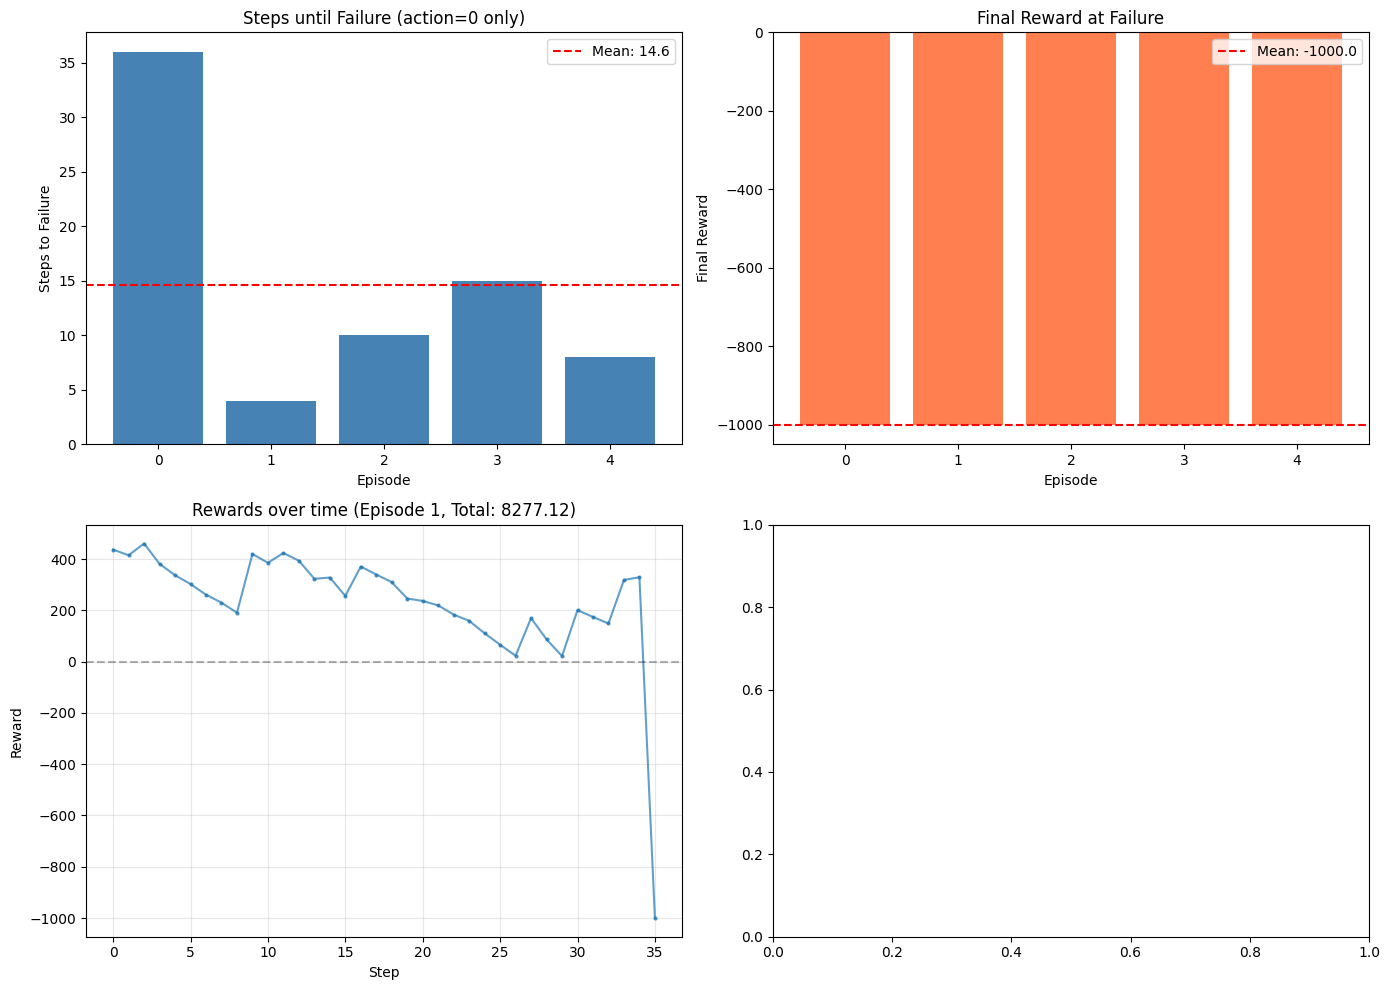

In [28]:
# 统计 failure 发生时的 step 分布
print("\n" + "="*60)
print("Failure 统计:")
print(f"  平均 steps 到 failure: {np.mean(results['failure_steps']):.1f}")
print(f"  最快 failure: {np.min(results['failure_steps'])} steps")
print(f"  最慢 failure: {np.max(results['failure_steps'])} steps")
print(f"  Final rewards: {results['final_rewards']}")

# 打印每个 episode 的 rewards 统计
print("\n每个 episode 的 rewards 统计:")
for i, rews in enumerate(results['rewards']):
    print(f"  Episode {i+1}: total={sum(rews):.2f}, mean={np.mean(rews):.2f}, min={min(rews):.2f}, max={max(rews):.2f}")

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Steps to failure 分布
ax1 = axes[0, 0]
ax1.bar(range(len(results['failure_steps'])), results['failure_steps'], color='steelblue')
ax1.axhline(np.mean(results['failure_steps']), color='r', linestyle='--', label=f"Mean: {np.mean(results['failure_steps']):.1f}")
ax1.set_xlabel('Episode')
ax1.set_ylabel('Steps to Failure')
ax1.set_title('Steps until Failure (action=0 only)')
ax1.legend()

# 2. Final rewards
ax2 = axes[0, 1]
ax2.bar(range(len(results['final_rewards'])), results['final_rewards'], color='coral')
ax2.axhline(np.mean(results['final_rewards']), color='r', linestyle='--', label=f"Mean: {np.mean(results['final_rewards']):.1f}")
ax2.set_xlabel('Episode')
ax2.set_ylabel('Final Reward')
ax2.set_title('Final Reward at Failure')
ax2.legend()

# 3. 第一个 episode 的 rewards 随时间变化
ax3 = axes[1, 0]
if results['rewards']:
    rews = results['rewards'][0]
    ax3.plot(rews, marker='o', markersize=2, alpha=0.7)
    ax3.axhline(0, color='k', linestyle='--', alpha=0.3)
    ax3.set_xlabel('Step')
    ax3.set_ylabel('Reward')
    ax3.set_title(f'Rewards over time (Episode 1, Total: {sum(rews):.2f})')
    ax3.grid(True, alpha=0.3)

# 4. Failure 前最后一个 state 的所有特征
ax4 = axes[1, 1]
if results['failure_states']:
    last_state = results['failure_states'][0]
    if len(last_state) >= 9:
        last_9 = last_state[-9:]
        ax4.bar(range(9), last_9, color='purple', alpha=0.7)
        ax4.set_xlabel('Feature Index')
        ax4.set_ylabel('Value')
        ax4.set_title('Last State Features at Failure (Episode 1)')
        ax4.set_xticks(range(9))

plt.tight_layout()
plt.show()


Rewards 趋势分析:


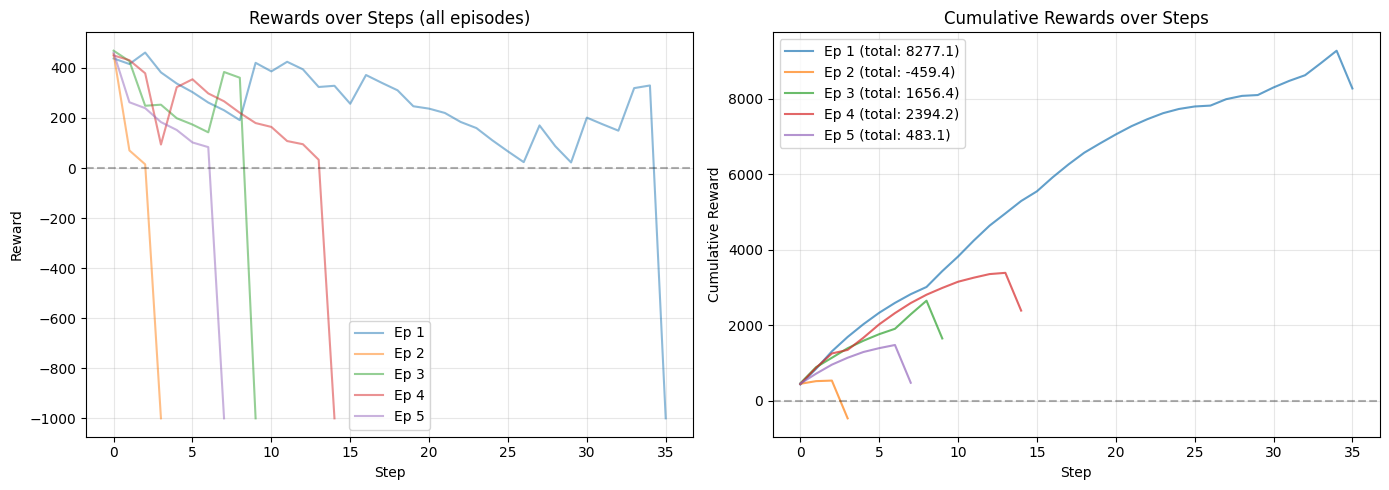


Failure State 特征分析:

所有 failure state 的最后 9 维:
  Shape: (1, 9, 9)

每个特征在 failure 时的统计:
  Feature 0: mean=149087.0625, std=412831.7188, range=[0.0000, 1316638.2500]
  Feature 1: mean=149940.8125, std=415216.1875, range=[0.0000, 1324236.0000]
  Feature 2: mean=149664.1875, std=414448.1875, range=[0.0000, 1321787.3750]
  Feature 3: mean=149359.2344, std=413591.5625, range=[0.0000, 1319059.5000]
  Feature 4: mean=150282.5938, std=416199.5625, range=[0.0000, 1327360.0000]
  Feature 5: mean=150439.2656, std=416639.1562, range=[0.0000, 1328760.0000]
  Feature 6: mean=149720.1562, std=414608.0938, range=[0.0000, 1322295.6250]
  Feature 7: mean=149917.3906, std=415152.1875, range=[0.0000, 1324031.5000]
  Feature 8: mean=149337.1875, std=413537.3750, range=[0.0000, 1318884.5000]


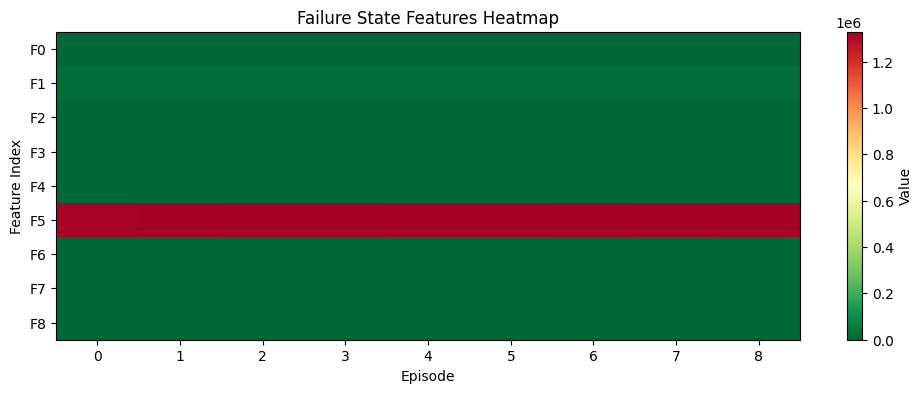

In [29]:
# 分析 rewards 变化趋势
print("\n" + "="*60)
print("Rewards 趋势分析:")
print("="*60)

plt.figure(figsize=(14, 5))

# 1. 所有 episodes 的 rewards 叠加
plt.subplot(1, 2, 1)
for i, rews in enumerate(results['rewards']):
    plt.plot(rews, alpha=0.5, label=f'Ep {i+1}')
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Rewards over Steps (all episodes)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Cumulative rewards
plt.subplot(1, 2, 2)
for i, rews in enumerate(results['rewards']):
    cumsum = np.cumsum(rews)
    plt.plot(cumsum, alpha=0.7, label=f'Ep {i+1} (total: {cumsum[-1]:.1f})')
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards over Steps')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 分析 failure state 的共同特征
print("\n" + "="*60)
print("Failure State 特征分析:")
print("="*60)

# 收集所有 failure state 的最后 9 维
failure_features = []
for state in results['failure_states']:
    if len(state) >= 9:
        failure_features.append(state[-9:])

if failure_features:
    failure_features = np.array(failure_features)
    
    print(f"\n所有 failure state 的最后 9 维:")
    print(f"  Shape: {failure_features.shape}")
    
    print(f"\n每个特征在 failure 时的统计:")
    for i in range(9):
        col = failure_features[:, i]
        print(f"  Feature {i}: mean={np.mean(col):.4f}, std={np.std(col):.4f}, range=[{np.min(col):.4f}, {np.max(col):.4f}]")
    
    # Heatmap
    plt.figure(figsize=(12, 4))
    plt.imshow(failure_features.T, aspect='auto', cmap='RdYlGn_r')
    plt.colorbar(label='Value')
    plt.xlabel('Episode')
    plt.ylabel('Feature Index')
    plt.title('Failure State Features Heatmap')
    plt.yticks(range(9), [f'F{i}' for i in range(9)])
    plt.show()

In [ ]:
# 分析 failure 前的趋势变化
print("\n" + "="*60)
print("Failure 前的趋势分析 (最后 10 步):")
print("="*60)

lookback = 10

plt.figure(figsize=(14, 8))

for ep_idx, traj in enumerate(results['trajectories'][:3]):  # 看前 3 个 episode
    n_steps = min(lookback, len(traj))
    last_states = traj[-n_steps:]
    
    # 每个 state 取最后 9 维
    features_over_time = []
    for s in last_states:
        if len(s) >= 9:
            features_over_time.append(s[-9:])
        else:
            features_over_time.append(np.zeros(9))
    
    features_over_time = np.array(features_over_time)
    
    plt.subplot(2, 2, ep_idx + 1)
    for i in range(9):
        plt.plot(features_over_time[:, i], label=f'F{i}', alpha=0.7)
    plt.xlabel('Steps to Failure')
    plt.ylabel('Feature Value')
    plt.title(f'Episode {ep_idx+1}: Last {n_steps} steps before failure')
    plt.legend(loc='upper left', fontsize=8, ncol=3)
    plt.axvline(n_steps - 1, color='red', linestyle='--', alpha=0.5, label='Failure')
    plt.grid(True, alpha=0.3)

# 计算 failure 前的趋势 (差分)
plt.subplot(2, 2, 4)
all_trends = []
for traj in results['trajectories']:
    if len(traj) >= 2:
        last = traj[-1][-9:] if len(traj[-1]) >= 9 else traj[-1]
        prev = traj[-2][-9:] if len(traj[-2]) >= 9 else traj[-2]
        trend = np.array(last) - np.array(prev)
        all_trends.append(trend)

if all_trends:
    avg_trend = np.mean(all_trends, axis=0)
    plt.bar(range(9), avg_trend, color='darkred', alpha=0.7)
    plt.xlabel('Feature Index')
    plt.ylabel('Avg Change (last step)')
    plt.title('Average Feature Change Before Failure')
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    print(f"\nFailure 前一步的平均特征变化:")
    for i, v in enumerate(avg_trend):
        sign = "↑" if v > 0 else "↓"
        print(f"  Feature {i}: {v:+.4f} {sign}")

plt.tight_layout()
plt.show()

## 结论

根据以上分析可以观察到：
1. **Failure 发生的时机**: 大约多少步后会 failure
2. **Failure state 特征**: 哪些特征值在 failure 时达到极端值
3. **Failure 前的趋势**: 哪些特征在 failure 前明显恶化（变化方向）

这些信息可以帮助设计：
- 更好的 reward shaping（在哪些特征恶化时给负 reward）
- 判断何时应该执行 action=2（卖出）

In [33]:
def analyze_repair_at_step(repair_step=8, num_episodes=10):
    """
    在第 repair_step 步执行 action=1 (repair)，其他时间执行 action=0
    对比不修理的情况，看 reward 趋势变化
    """
    
    results_repair = {
        'trajectories': [],
        'rewards': [],
        'failure_steps': [],
        'final_rewards': [],
        'total_rewards': []
    }
    
    results_no_repair = {
        'trajectories': [],
        'rewards': [],
        'failure_steps': [],
        'final_rewards': [],
        'total_rewards': []
    }
    
    for ep in range(num_episodes):
        # === 有 repair 的情况 ===
        state, info = env.reset()
        trajectory = [state.copy()]
        rewards = []
        step = 0
        
        while True:
            # 在第 repair_step 步修理
            if step == repair_step:
                action = 1  # repair
            else:
                action = 0  # do nothing
            
            next_state, reward, done, truncated, info = env.step(action)
            trajectory.append(next_state.copy())
            rewards.append(reward)
            step += 1
            
            if done or truncated:
                results_repair['trajectories'].append(trajectory)
                results_repair['rewards'].append(rewards)
                results_repair['failure_steps'].append(step)
                results_repair['final_rewards'].append(reward)
                results_repair['total_rewards'].append(sum(rewards))
                break
        
        # === 无 repair 的情况（baseline）===
        state, info = env.reset()
        trajectory = [state.copy()]
        rewards = []
        step = 0
        
        while True:
            action = 0  # always do nothing
            next_state, reward, done, truncated, info = env.step(action)
            trajectory.append(next_state.copy())
            rewards.append(reward)
            step += 1
            
            if done or truncated:
                results_no_repair['trajectories'].append(trajectory)
                results_no_repair['rewards'].append(rewards)
                results_no_repair['failure_steps'].append(step)
                results_no_repair['final_rewards'].append(reward)
                results_no_repair['total_rewards'].append(sum(rewards))
                break
    
    return results_repair, results_no_repair

# 运行分析：在第 8 步修理
print("="*60)
print("分析：在第 8 步执行 repair vs 不修理")
print("="*60)

results_repair, results_no_repair = analyze_repair_at_step(repair_step=8, num_episodes=5)

print(f"\n=== 有 Repair (step=8) ===")
print(f"  平均 steps 到结束: {np.mean(results_repair['failure_steps']):.1f} ± {np.std(results_repair['failure_steps']):.1f}")
print(f"  平均 total reward: {np.mean(results_repair['total_rewards']):.2f} ± {np.std(results_repair['total_rewards']):.2f}")
print(f"  平均 final reward: {np.mean(results_repair['final_rewards']):.2f}")

print(f"\n=== 无 Repair (baseline) ===")
print(f"  平均 steps 到结束: {np.mean(results_no_repair['failure_steps']):.1f} ± {np.std(results_no_repair['failure_steps']):.1f}")
print(f"  平均 total reward: {np.mean(results_no_repair['total_rewards']):.2f} ± {np.std(results_no_repair['total_rewards']):.2f}")
print(f"  平均 final reward: {np.mean(results_no_repair['final_rewards']):.2f}")

print(f"\n=== 对比 ===")
diff_steps = np.mean(results_repair['failure_steps']) - np.mean(results_no_repair['failure_steps'])
diff_reward = np.mean(results_repair['total_rewards']) - np.mean(results_no_repair['total_rewards'])
print(f"  Repair 延长寿命: {diff_steps:+.1f} steps")
print(f"  Repair 增加 reward: {diff_reward:+.2f}")

分析：在第 8 步执行 repair vs 不修理


2026-02-19 22:18:35,993 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure


2026-02-19 22:19:01,846 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure


2026-02-19 22:19:33,145 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure


2026-02-19 22:19:57,544 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully
2026-02-19 22:20:26,180 - student_client.student_gym_env - ERROR - Failed to step episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc: Server error '500 Internal Server Error' for url 'http://rlchallenge.orailix.com/api/v1/episode/step'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/500
2026-02-19 22:20:27,017 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully
2026-02-19 22:20:27,040 - student_client.student_gym_env - ERROR - Failed to step episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc: Server error '500 Internal Server Error' for url 'http://rlchallenge.orailix.com/api/v1/episode/step'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/500
2026-02-19 22:20:27,823 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-3001

Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure


2026-02-19 22:20:29,739 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure


2026-02-19 22:21:17,270 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure


2026-02-19 22:21:20,299 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure


2026-02-19 22:21:58,690 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== 有 Repair (step=8) ===
  平均 steps 到结束: 20.6 ± 11.6
  平均 total reward: 4206.24 ± 2938.79
  平均 final reward: -800.00

=== 无 Repair (baseline) ===
  平均 steps 到结束: 11.0 ± 10.3
  平均 total reward: 1466.65 ± 2695.23
  平均 final reward: -800.00

=== 对比 ===
  Repair 延长寿命: +9.6 steps
  Repair 增加 reward: +2739.59


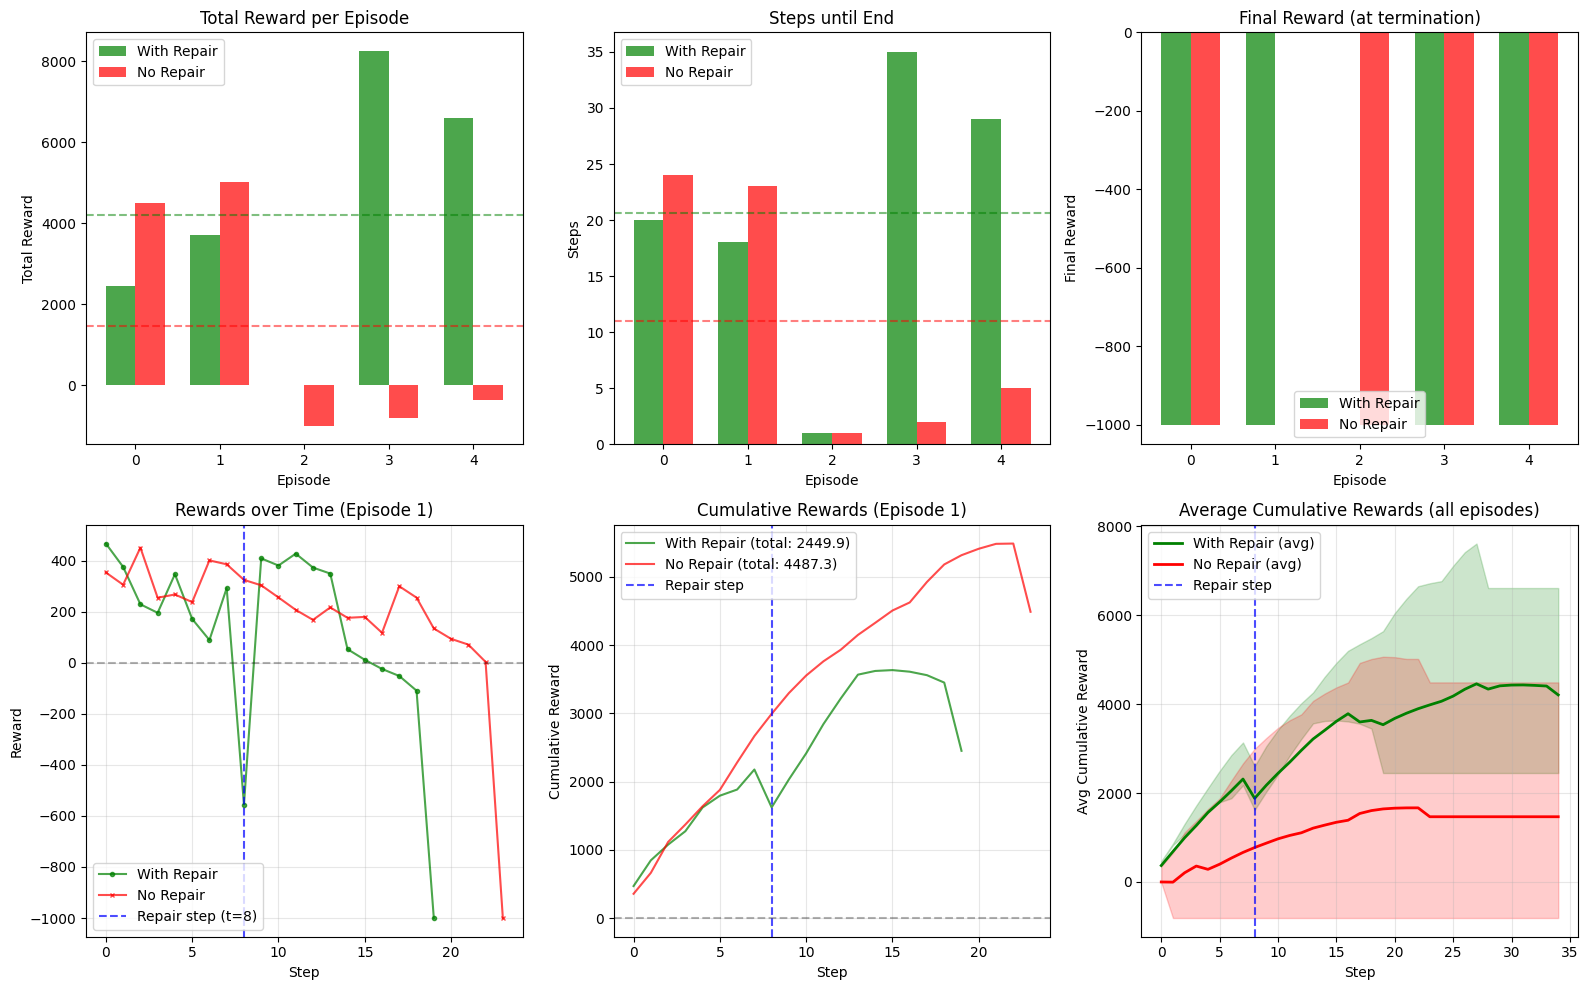

In [34]:
# 可视化对比
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Total rewards 对比 (柱状图)
ax1 = axes[0, 0]
x = np.arange(len(results_repair['total_rewards']))
width = 0.35
ax1.bar(x - width/2, results_repair['total_rewards'], width, label='With Repair', color='green', alpha=0.7)
ax1.bar(x + width/2, results_no_repair['total_rewards'], width, label='No Repair', color='red', alpha=0.7)
ax1.axhline(np.mean(results_repair['total_rewards']), color='green', linestyle='--', alpha=0.5)
ax1.axhline(np.mean(results_no_repair['total_rewards']), color='red', linestyle='--', alpha=0.5)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Reward')
ax1.set_title('Total Reward per Episode')
ax1.legend()

# 2. Steps to failure 对比
ax2 = axes[0, 1]
ax2.bar(x - width/2, results_repair['failure_steps'], width, label='With Repair', color='green', alpha=0.7)
ax2.bar(x + width/2, results_no_repair['failure_steps'], width, label='No Repair', color='red', alpha=0.7)
ax2.axhline(np.mean(results_repair['failure_steps']), color='green', linestyle='--', alpha=0.5)
ax2.axhline(np.mean(results_no_repair['failure_steps']), color='red', linestyle='--', alpha=0.5)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Steps')
ax2.set_title('Steps until End')
ax2.legend()

# 3. Final rewards 对比
ax3 = axes[0, 2]
ax3.bar(x - width/2, results_repair['final_rewards'], width, label='With Repair', color='green', alpha=0.7)
ax3.bar(x + width/2, results_no_repair['final_rewards'], width, label='No Repair', color='red', alpha=0.7)
ax3.set_xlabel('Episode')
ax3.set_ylabel('Final Reward')
ax3.set_title('Final Reward (at termination)')
ax3.legend()

# 4. Rewards over time (第一个 episode 对比)
ax4 = axes[1, 0]
if results_repair['rewards'] and results_no_repair['rewards']:
    rews_repair = results_repair['rewards'][0]
    rews_no_repair = results_no_repair['rewards'][0]
    ax4.plot(rews_repair, label='With Repair', color='green', alpha=0.7, marker='o', markersize=3)
    ax4.plot(rews_no_repair, label='No Repair', color='red', alpha=0.7, marker='x', markersize=3)
    ax4.axvline(8, color='blue', linestyle='--', alpha=0.7, label='Repair step (t=8)')
    ax4.axhline(0, color='k', linestyle='--', alpha=0.3)
    ax4.set_xlabel('Step')
    ax4.set_ylabel('Reward')
    ax4.set_title('Rewards over Time (Episode 1)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

# 5. Cumulative rewards (第一个 episode 对比)
ax5 = axes[1, 1]
if results_repair['rewards'] and results_no_repair['rewards']:
    cumsum_repair = np.cumsum(results_repair['rewards'][0])
    cumsum_no_repair = np.cumsum(results_no_repair['rewards'][0])
    ax5.plot(cumsum_repair, label=f'With Repair (total: {cumsum_repair[-1]:.1f})', color='green', alpha=0.7)
    ax5.plot(cumsum_no_repair, label=f'No Repair (total: {cumsum_no_repair[-1]:.1f})', color='red', alpha=0.7)
    ax5.axvline(8, color='blue', linestyle='--', alpha=0.7, label='Repair step')
    ax5.axhline(0, color='k', linestyle='--', alpha=0.3)
    ax5.set_xlabel('Step')
    ax5.set_ylabel('Cumulative Reward')
    ax5.set_title('Cumulative Rewards (Episode 1)')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

# 6. 所有 episodes 的 cumulative rewards 平均
ax6 = axes[1, 2]
# 对齐长度后取平均
max_len = max(max(len(r) for r in results_repair['rewards']), 
              max(len(r) for r in results_no_repair['rewards']))

# Repair
cumsum_all_repair = []
for r in results_repair['rewards']:
    cs = np.cumsum(r)
    padded = np.pad(cs, (0, max_len - len(cs)), constant_values=cs[-1])
    cumsum_all_repair.append(padded)
avg_cumsum_repair = np.mean(cumsum_all_repair, axis=0)

# No repair
cumsum_all_no_repair = []
for r in results_no_repair['rewards']:
    cs = np.cumsum(r)
    padded = np.pad(cs, (0, max_len - len(cs)), constant_values=cs[-1])
    cumsum_all_no_repair.append(padded)
avg_cumsum_no_repair = np.mean(cumsum_all_no_repair, axis=0)

ax6.plot(avg_cumsum_repair, label='With Repair (avg)', color='green', linewidth=2)
ax6.plot(avg_cumsum_no_repair, label='No Repair (avg)', color='red', linewidth=2)
ax6.fill_between(range(max_len), 
                  np.percentile(cumsum_all_repair, 25, axis=0),
                  np.percentile(cumsum_all_repair, 75, axis=0),
                  color='green', alpha=0.2)
ax6.fill_between(range(max_len),
                  np.percentile(cumsum_all_no_repair, 25, axis=0),
                  np.percentile(cumsum_all_no_repair, 75, axis=0),
                  color='red', alpha=0.2)
ax6.axvline(8, color='blue', linestyle='--', alpha=0.7, label='Repair step')
ax6.set_xlabel('Step')
ax6.set_ylabel('Avg Cumulative Reward')
ax6.set_title('Average Cumulative Rewards (all episodes)')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
def analyze_repair_at_steps(repair_steps=[9, 18, 25], num_episodes=5):
    """
    在指定的多个 step 执行 action=1 (repair)，其他时间执行 action=0
    """
    
    results = {
        'trajectories': [],
        'rewards': [],
        'failure_steps': [],
        'final_rewards': [],
        'total_rewards': [],
        'actions': []  # 记录每步的 action
    }
    
    for ep in range(num_episodes):
        state, info = env.reset()
        trajectory = [state.copy()]
        rewards = []
        actions = []
        step = 0
        
        while True:
            # 在指定的 steps 修理
            if step in repair_steps:
                action = 1  # repair
            else:
                action = 0  # do nothing
            
            next_state, reward, done, truncated, info = env.step(action)
            trajectory.append(next_state.copy())
            rewards.append(reward)
            actions.append(action)
            step += 1
            
            if done or truncated:
                print(f"\n=== Episode {ep+1} ===")
                print(f"  Steps until end: {step}")
                print(f"  Total reward: {sum(rewards):.2f}")
                print(f"  Final reward: {reward:.2f}")
                print(f"  Repair actions at steps: {[i for i, a in enumerate(actions) if a == 1]}")
                
                results['trajectories'].append(trajectory)
                results['rewards'].append(rewards)
                results['failure_steps'].append(step)
                results['final_rewards'].append(reward)
                results['total_rewards'].append(sum(rewards))
                results['actions'].append(actions)
                break
    
    return results

# 运行分析：在第 9, 18, 25 步修理
print("="*60)
print("分析：在第 9, 18, 25 步执行 repair")
print("="*60)

results_multi_repair = analyze_repair_at_steps(repair_steps=[9, 18, 25], num_episodes=5)

print(f"\n=== 统计 ===")
print(f"  平均 steps 到结束: {np.mean(results_multi_repair['failure_steps']):.1f} ± {np.std(results_multi_repair['failure_steps']):.1f}")
print(f"  平均 total reward: {np.mean(results_multi_repair['total_rewards']):.2f} ± {np.std(results_multi_repair['total_rewards']):.2f}")
print(f"  平均 final reward: {np.mean(results_multi_repair['final_rewards']):.2f}")

分析：在第 9, 18, 25 步执行 repair


2026-02-19 22:25:06,990 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 1 ===
  Steps until end: 30
  Total reward: 5977.74
  Final reward: -1000.00
  Repair actions at steps: [9, 18, 25]


2026-02-19 22:26:01,437 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully
2026-02-19 22:26:16,136 - student_client.student_gym_env - ERROR - Failed to step episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc: Server error '500 Internal Server Error' for url 'http://rlchallenge.orailix.com/api/v1/episode/step'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/500



=== Episode 2 ===
  Steps until end: 9
  Total reward: 1032.19
  Final reward: 0.00
  Repair actions at steps: []


2026-02-19 22:26:17,279 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 3 ===
  Steps until end: 14
  Total reward: 2456.97
  Final reward: -1000.00
  Repair actions at steps: [9]


2026-02-19 22:26:43,397 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully


Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reached termination state, reason: failure

=== Episode 4 ===
  Steps until end: 15
  Total reward: 1482.02
  Final reward: -1000.00
  Repair actions at steps: [9]


2026-02-19 22:27:11,074 - student_client.student_gym_env - INFO - Episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc reset successfully
2026-02-19 22:27:29,744 - student_client.student_gym_env - ERROR - Failed to step episode 6eaf2c73-e3bb-4d1d-a7c4-300123cd51bc: Server error '500 Internal Server Error' for url 'http://rlchallenge.orailix.com/api/v1/episode/step'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/500



=== Episode 5 ===
  Steps until end: 11
  Total reward: 2570.77
  Final reward: 0.00
  Repair actions at steps: [9]

=== 统计 ===
  平均 steps 到结束: 15.8 ± 7.4
  平均 total reward: 2703.94 ± 1736.91
  平均 final reward: -600.00


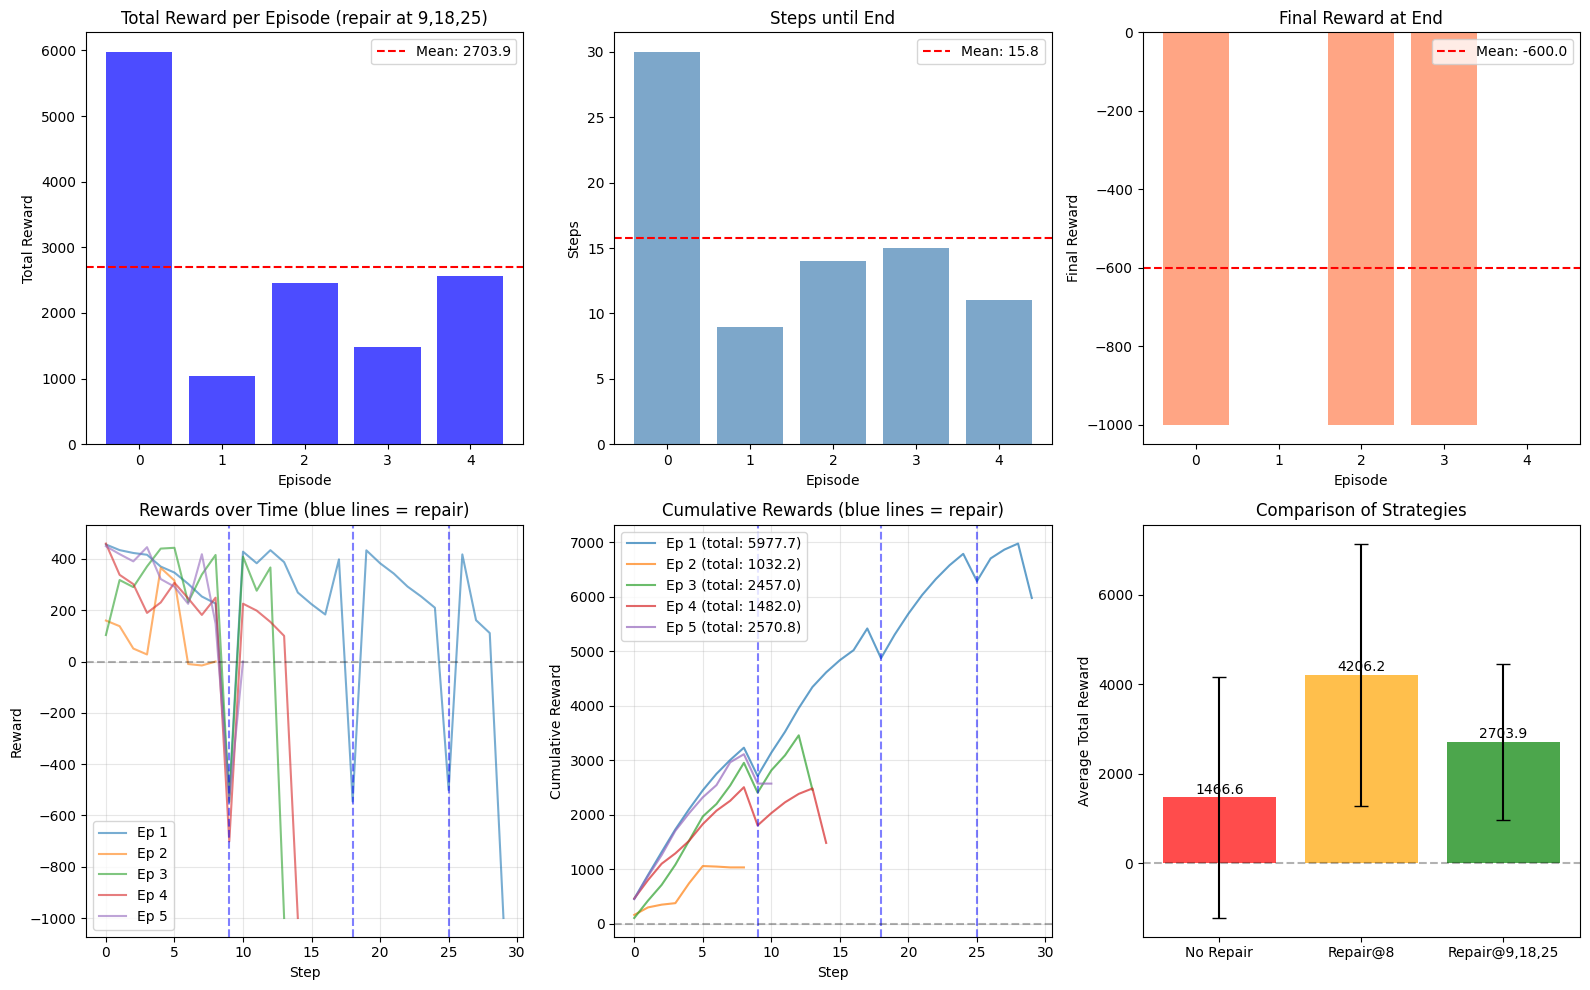


策略对比总结:
  No Repair:       avg reward = 1466.65, avg steps = 11.0
  Repair@8:        avg reward = 4206.24, avg steps = 20.6
  Repair@9,18,25:  avg reward = 2703.94, avg steps = 15.8


In [37]:
# 可视化：在第 9, 18, 25 步修理的效果
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

repair_steps = [9, 18, 25]

# 1. Total rewards
ax1 = axes[0, 0]
ax1.bar(range(len(results_multi_repair['total_rewards'])), results_multi_repair['total_rewards'], color='blue', alpha=0.7)
ax1.axhline(np.mean(results_multi_repair['total_rewards']), color='r', linestyle='--', label=f"Mean: {np.mean(results_multi_repair['total_rewards']):.1f}")
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Reward')
ax1.set_title('Total Reward per Episode (repair at 9,18,25)')
ax1.legend()

# 2. Steps to end
ax2 = axes[0, 1]
ax2.bar(range(len(results_multi_repair['failure_steps'])), results_multi_repair['failure_steps'], color='steelblue', alpha=0.7)
ax2.axhline(np.mean(results_multi_repair['failure_steps']), color='r', linestyle='--', label=f"Mean: {np.mean(results_multi_repair['failure_steps']):.1f}")
ax2.set_xlabel('Episode')
ax2.set_ylabel('Steps')
ax2.set_title('Steps until End')
ax2.legend()

# 3. Final rewards
ax3 = axes[0, 2]
ax3.bar(range(len(results_multi_repair['final_rewards'])), results_multi_repair['final_rewards'], color='coral', alpha=0.7)
ax3.axhline(np.mean(results_multi_repair['final_rewards']), color='r', linestyle='--', label=f"Mean: {np.mean(results_multi_repair['final_rewards']):.1f}")
ax3.set_xlabel('Episode')
ax3.set_ylabel('Final Reward')
ax3.set_title('Final Reward at End')
ax3.legend()

# 4. Rewards over time (所有 episodes)
ax4 = axes[1, 0]
for i, rews in enumerate(results_multi_repair['rewards']):
    ax4.plot(rews, alpha=0.6, label=f'Ep {i+1}')
for rs in repair_steps:
    ax4.axvline(rs, color='blue', linestyle='--', alpha=0.5)
ax4.axhline(0, color='k', linestyle='--', alpha=0.3)
ax4.set_xlabel('Step')
ax4.set_ylabel('Reward')
ax4.set_title('Rewards over Time (blue lines = repair)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Cumulative rewards
ax5 = axes[1, 1]
for i, rews in enumerate(results_multi_repair['rewards']):
    cumsum = np.cumsum(rews)
    ax5.plot(cumsum, alpha=0.7, label=f'Ep {i+1} (total: {cumsum[-1]:.1f})')
for rs in repair_steps:
    ax5.axvline(rs, color='blue', linestyle='--', alpha=0.5)
ax5.axhline(0, color='k', linestyle='--', alpha=0.3)
ax5.set_xlabel('Step')
ax5.set_ylabel('Cumulative Reward')
ax5.set_title('Cumulative Rewards (blue lines = repair)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. 对比：不同策略的平均 total reward
ax6 = axes[1, 2]
strategies = ['No Repair', 'Repair@8', 'Repair@9,18,25']
avg_rewards = [
    np.mean(results_no_repair['total_rewards']),
    np.mean(results_repair['total_rewards']),
    np.mean(results_multi_repair['total_rewards'])
]
std_rewards = [
    np.std(results_no_repair['total_rewards']),
    np.std(results_repair['total_rewards']),
    np.std(results_multi_repair['total_rewards'])
]
colors = ['red', 'orange', 'green']
bars = ax6.bar(strategies, avg_rewards, color=colors, alpha=0.7, yerr=std_rewards, capsize=5)
ax6.set_ylabel('Average Total Reward')
ax6.set_title('Comparison of Strategies')
ax6.axhline(0, color='k', linestyle='--', alpha=0.3)

# 在柱子上标注数值
for bar, val in zip(bars, avg_rewards):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{val:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 打印对比总结
print("\n" + "="*60)
print("策略对比总结:")
print("="*60)
print(f"  No Repair:       avg reward = {avg_rewards[0]:.2f}, avg steps = {np.mean(results_no_repair['failure_steps']):.1f}")
print(f"  Repair@8:        avg reward = {avg_rewards[1]:.2f}, avg steps = {np.mean(results_repair['failure_steps']):.1f}")
print(f"  Repair@9,18,25:  avg reward = {avg_rewards[2]:.2f}, avg steps = {np.mean(results_multi_repair['failure_steps']):.1f}")